# **Determining Client Credibility**

***
a data analysis and model building project made by
Dama Dhananjaya Daliman
***

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import dill
base_dir = "./home-credit-default-risk/"

## **Explore the Data**

In [2]:
col_desc = pd.read_csv(base_dir+"HomeCredit_columns_description.csv", encoding = "ISO-8859-1", engine='python')
col_desc

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
...,...,...,...,...,...
214,217,installments_payments.csv,NUM_INSTALMENT_NUMBER,On which installment we observe payment,NaN
215,218,installments_payments.csv,DAYS_INSTALMENT,When the installment of previous credit was su...,time only relative to the application
216,219,installments_payments.csv,DAYS_ENTRY_PAYMENT,When was the installments of previous credit p...,time only relative to the application
217,220,installments_payments.csv,AMT_INSTALMENT,What was the prescribed installment amount of ...,NaN


In [3]:
b_bal = pd.read_csv(base_dir+"bureau_balance.csv")
b_bal

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C
...,...,...,...
27299920,5041336,-47,X
27299921,5041336,-48,X
27299922,5041336,-49,X
27299923,5041336,-50,X


In [4]:
for i in col_desc[col_desc["Table"]=="bureau_balance.csv"]["Description"]:
    print(i)
    print()

Recoded ID of Credit Bureau credit (unique coding for each application) - use this to join to CREDIT_BUREAU table 

Month of balance relative to application date (-1 means the freshest balance date)

Status of Credit Bureau loan during the month (active, closed, DPD0-30, [C means closed, X means status unknown, 0 means no DPD, 1 means maximal did during month between 1-30, 2 means DPD 31-60, 5 means DPD 120+ or sold or written off ] )



In [5]:
bureau = pd.read_csv(base_dir+"bureau.csv")
print(len(bureau["SK_ID_BUREAU"].unique().tolist()))

1716428


In [6]:
for i in col_desc[col_desc["Table"]=="bureau.csv"]["Description"]:
    print(i)
    print()

ID of loan in our sample - one loan in our sample can have 0,1,2 or more related previous credits in credit bureau 

Recoded ID of previous Credit Bureau credit related to our loan (unique coding for each loan application)

Status of the Credit Bureau (CB) reported credits

Recoded currency of the Credit Bureau credit

How many days before current application did client apply for Credit Bureau credit

Number of days past due on CB credit at the time of application for related loan in our sample

Remaining duration of CB credit (in days) at the time of application in Home Credit

Days since CB credit ended at the time of application in Home Credit (only for closed credit)

Maximal amount overdue on the Credit Bureau credit so far (at application date of loan in our sample)

How many times was the Credit Bureau credit prolonged

Current credit amount for the Credit Bureau credit

Current debt on Credit Bureau credit

Current credit limit of credit card reported in Credit Bureau

Current 

In [7]:
new_b = pd.merge(b_bal, bureau)
new_b

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS,SK_ID_CURR,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,5715448,0,C,380361,Active,currency 1,-820,0,31069.0,NaN,NaN,0,67500.0,0.0,67500.0,0.0,Credit card,-183,0.0
1,5715448,-1,C,380361,Active,currency 1,-820,0,31069.0,NaN,NaN,0,67500.0,0.0,67500.0,0.0,Credit card,-183,0.0
2,5715448,-2,C,380361,Active,currency 1,-820,0,31069.0,NaN,NaN,0,67500.0,0.0,67500.0,0.0,Credit card,-183,0.0
3,5715448,-3,C,380361,Active,currency 1,-820,0,31069.0,NaN,NaN,0,67500.0,0.0,67500.0,0.0,Credit card,-183,0.0
4,5715448,-4,C,380361,Active,currency 1,-820,0,31069.0,NaN,NaN,0,67500.0,0.0,67500.0,0.0,Credit card,-183,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24179736,5041336,-47,X,101874,Active,currency 1,-1579,0,-1274.0,NaN,30519.855,0,142317.0,0.0,0.0,0.0,Consumer credit,-111,NaN
24179737,5041336,-48,X,101874,Active,currency 1,-1579,0,-1274.0,NaN,30519.855,0,142317.0,0.0,0.0,0.0,Consumer credit,-111,NaN
24179738,5041336,-49,X,101874,Active,currency 1,-1579,0,-1274.0,NaN,30519.855,0,142317.0,0.0,0.0,0.0,Consumer credit,-111,NaN
24179739,5041336,-50,X,101874,Active,currency 1,-1579,0,-1274.0,NaN,30519.855,0,142317.0,0.0,0.0,0.0,Consumer credit,-111,NaN


In [8]:
cc_bal = pd.read_csv(base_dir+"credit_card_balance.csv")
cc_bal

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3840307,1036507,328243,-9,0.000,45000,NaN,0.0,NaN,NaN,0.000,...,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
3840308,1714892,347207,-9,0.000,45000,0.0,0.0,0.0,0.0,0.000,...,0.000,0.000,0.0,0,0.0,0.0,23.0,Active,0,0
3840309,1302323,215757,-9,275784.975,585000,270000.0,270000.0,0.0,0.0,2250.000,...,273093.975,273093.975,2.0,2,0.0,0.0,18.0,Active,0,0
3840310,1624872,430337,-10,0.000,450000,NaN,0.0,NaN,NaN,0.000,...,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0


In [9]:
for i in col_desc[col_desc["Table"]=="credit_card_balance.csv"]["Description"]:
    print(i)
    print()

ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit)

ID of loan in our sample

Month of balance relative to application date (-1 means the freshest balance date)

Balance during the month of previous credit

Credit card limit during the month of the previous credit

Amount drawing at ATM during the month of the previous credit

Amount drawing during the month of the previous credit

Amount of other drawings during the month of the previous credit

Amount drawing or buying goods during the month of the previous credit

Minimal installment for this month of the previous credit

How much did the client pay during the month on the previous credit

How much did the client pay during the month in total on the previous credit

Amount receivable for principal on the previous credit

Amount receivable on the previous credit

Total amount receivable on the previous credit

Number of drawings at ATM duri

In [10]:
ins_pay = pd.read_csv(base_dir+"installments_payments.csv")
ins_pay

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585
...,...,...,...,...,...,...,...,...
13605396,2186857,428057,0.0,66,-1624.0,NaN,67.500,NaN
13605397,1310347,414406,0.0,47,-1539.0,NaN,67.500,NaN
13605398,1308766,402199,0.0,43,-7.0,NaN,43737.435,NaN
13605399,1062206,409297,0.0,43,-1986.0,NaN,67.500,NaN


In [11]:
for i in col_desc[col_desc["Table"]=="installments_payments.csv"]["Description"]:
    print(i)
    print()

ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit)

ID of loan in our sample

Version of installment calendar (0 is for credit card) of previous credit. Change of installment version from month to month signifies that some parameter of payment calendar has changed

On which installment we observe payment

When the installment of previous credit was supposed to be paid (relative to application date of current loan)

When was the installments of previous credit paid actually (relative to application date of current loan)

What was the prescribed installment amount of previous credit on this installment

What the client actually paid on previous credit on this installment



### Insight 1

In [12]:
didnt_pay = ins_pay[ins_pay["DAYS_ENTRY_PAYMENT"].isna()]
num_ver_didnt_pay = didnt_pay["NUM_INSTALMENT_VERSION"].value_counts()
num_ver_didnt_pay

0.0      1707
1.0       587
2.0       185
3.0       155
6.0        75
5.0        57
4.0        50
7.0        20
39.0       16
12.0        9
61.0        8
9.0         7
10.0        5
8.0         5
16.0        4
21.0        3
13.0        2
11.0        2
15.0        2
68.0        1
178.0       1
14.0        1
33.0        1
23.0        1
31.0        1
Name: NUM_INSTALMENT_VERSION, dtype: int64

In [13]:
nvdp_ind = num_ver_didnt_pay.index.tolist()
nvdp_ind

[0.0,
 1.0,
 2.0,
 3.0,
 6.0,
 5.0,
 4.0,
 7.0,
 39.0,
 12.0,
 61.0,
 9.0,
 10.0,
 8.0,
 16.0,
 21.0,
 13.0,
 11.0,
 15.0,
 68.0,
 178.0,
 14.0,
 33.0,
 23.0,
 31.0]

In [14]:
total_num_ver = ins_pay["NUM_INSTALMENT_VERSION"].value_counts()
total_num_ver

1.0      8485004
0.0      4082498
2.0       620283
3.0       237063
4.0        55274
          ...   
178.0          1
58.0           1
54.0           1
53.0           1
57.0           1
Name: NUM_INSTALMENT_VERSION, Length: 65, dtype: int64

In [15]:
tnv_ind = total_num_ver.index.tolist()
tnv_ind

[1.0,
 0.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 9.0,
 8.0,
 10.0,
 11.0,
 13.0,
 12.0,
 15.0,
 14.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 29.0,
 28.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 39.0,
 36.0,
 37.0,
 38.0,
 43.0,
 40.0,
 41.0,
 42.0,
 44.0,
 45.0,
 61.0,
 72.0,
 46.0,
 47.0,
 52.0,
 49.0,
 50.0,
 48.0,
 51.0,
 56.0,
 73.0,
 59.0,
 68.0,
 55.0,
 178.0,
 58.0,
 54.0,
 53.0,
 57.0]

In [16]:
nvdp_per = {}
for i in tnv_ind:
    if i in nvdp_ind:
        nvdp_per[i] = round((num_ver_didnt_pay[i] / total_num_ver[i]), 5)
print(nvdp_per)
    

{1.0: 7e-05, 0.0: 0.00042, 2.0: 0.0003, 3.0: 0.00065, 4.0: 0.0009, 5.0: 0.00118, 6.0: 0.00439, 7.0: 0.00119, 9.0: 0.00084, 8.0: 0.00064, 10.0: 0.00108, 11.0: 0.00046, 13.0: 0.00068, 12.0: 0.00314, 15.0: 0.00104, 14.0: 0.00052, 16.0: 0.00312, 21.0: 0.00509, 23.0: 0.00268, 31.0: 0.0099, 33.0: 0.01587, 39.0: 0.38095, 61.0: 1.0, 68.0: 1.0, 178.0: 1.0}


In [17]:
sorted_nvdp_per = sorted(nvdp_per.items(), key=lambda x:x[1])

print(sorted_nvdp_per)        

[(1.0, 7e-05), (2.0, 0.0003), (0.0, 0.00042), (11.0, 0.00046), (14.0, 0.00052), (8.0, 0.00064), (3.0, 0.00065), (13.0, 0.00068), (9.0, 0.00084), (4.0, 0.0009), (15.0, 0.00104), (10.0, 0.00108), (5.0, 0.00118), (7.0, 0.00119), (23.0, 0.00268), (16.0, 0.00312), (12.0, 0.00314), (6.0, 0.00439), (21.0, 0.00509), (31.0, 0.0099), (33.0, 0.01587), (39.0, 0.38095), (61.0, 1.0), (68.0, 1.0), (178.0, 1.0)]


In [18]:
fig2_labels = []
fig2_data = []
for i in sorted_nvdp_per:
    if i[1] > 0.1:
        fig2_data.append(i[1])
        fig2_labels.append(str(int(i[0])))
    else:
        fig2_data.append(i[1])
        fig2_labels.append("")

<function matplotlib.pyplot.show(close=None, block=None)>

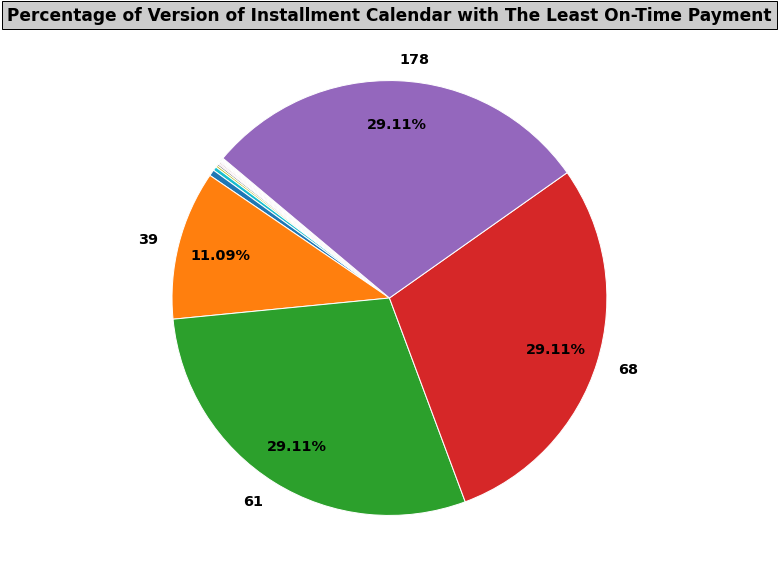

In [19]:
fig2 = plt.figure(figsize = (15,10))
plt.title("Percentage of Version of Installment Calendar with The Least On-Time Payment",
          fontdict={'fontsize':17, 'weight':"bold"},
          bbox={'facecolor':'0.8', 'pad':5})
plt.pie(fig2_data, labels=fig2_labels, startangle=140,
        wedgeprops={'edgecolor': 'white'},
        textprops={'size': 'x-large', 'color':'black', 'weight':'bold'},
        autopct=lambda p: (str(round(p, 2))+"%") if p > 1 else None, pctdistance=0.8)
plt.show

***
 We found something interesting here, installment calendars number 178, 68, and 61 were the least installment calendar version with on-time payment.
***

In [20]:
p_cash = pd.read_csv(base_dir+"POS_CASH_balance.csv")
p_cash

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0
...,...,...,...,...,...,...,...,...
10001353,2448283,226558,-20,6.0,0.0,Active,843,0
10001354,1717234,141565,-19,12.0,0.0,Active,602,0
10001355,1283126,315695,-21,10.0,0.0,Active,609,0
10001356,1082516,450255,-22,12.0,0.0,Active,614,0


In [21]:
for i in col_desc[col_desc["Table"]=="POS_CASH_balance.csv"]["Description"]:
    print(i)
    print()

ID of previous credit in Home Credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit)

ID of loan in our sample

Month of balance relative to application date (-1 means the information to the freshest monthly snapshot, 0 means the information at application - often it will be the same as -1 as many banks are not updating the information to Credit Bureau regularly )

Term of previous credit (can change over time)

Installments left to pay on the previous credit

Contract status during the month

DPD (days past due) during the month of previous credit

DPD during the month with tolerance (debts with low loan amounts are ignored) of the previous credit



In [22]:
prev_app = pd.read_csv(base_dir+"previous_application.csv")
prev_app

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,...,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,...,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


In [23]:
for i in col_desc[col_desc["Table"]=="previous_application.csv"]["Description"]:
    print(i)
    print()

ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loan applications in Home Credit, previous application could, but not necessarily have to lead to credit) 

ID of loan in our sample

Contract product type (Cash loan, consumer loan [POS] ,...) of the previous application

Annuity of previous application

For how much credit did client ask on the previous application

Final credit amount on the previous application. This differs from AMT_APPLICATION in a way that the AMT_APPLICATION is the amount for which the client initially applied for, but during our approval process he could have received different amount - AMT_CREDIT

Down payment on the previous application

Goods price of good that client asked for (if applicable) on the previous application

On which day of the week did the client apply for previous application

Approximately at what day hour did the client apply for the previous application

Flag if it w

In [24]:
sample = pd.read_csv(base_dir+"sample_submission.csv")
sample

,SK_ID_CURR,TARGET
0,100001,0.5
1,100005,0.5
2,100013,0.5
3,100028,0.5
4,100038,0.5
...,...,...
48739,456221,0.5
48740,456222,0.5
48741,456223,0.5
48742,456224,0.5


In [25]:
train = pd.read_csv(base_dir+"application_train.csv")
train.head(11)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
for i in col_desc[col_desc["Table"]=="application_{train|test}.csv"]["Description"]:
    print(i)
    print()

ID of loan in our sample

Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)

Identification if loan is cash or revolving

Gender of the client

Flag if the client owns a car

Flag if client owns a house or flat

Number of children the client has

Income of the client

Credit amount of the loan

Loan annuity

For consumer loans it is the price of the goods for which the loan is given

Who was accompanying client when he was applying for the loan

Clients income type (businessman, working, maternity leave,)

Level of highest education the client achieved

Family status of the client

What is the housing situation of the client (renting, living with parents, ...)

Normalized population of region where client lives (higher number means the client lives in more populated region)

Client's age in days at the time of application

How many days before the a

In [27]:
train.shape

(307511, 122)

### Insight 2

In [28]:
train_bureau = pd.merge(train, new_b)
train_bureau

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE
0,155054,0,Cash loans,M,N,N,0,180000.0,450000.0,NaN,...,-397.0,-397.0,15667.155,0,204705.0,0.0,0.0,0.0,Consumer credit,-397
1,155054,0,Cash loans,M,N,N,0,180000.0,450000.0,NaN,...,-397.0,-397.0,15667.155,0,204705.0,0.0,0.0,0.0,Consumer credit,-397
2,155054,0,Cash loans,M,N,N,0,180000.0,450000.0,NaN,...,-397.0,-397.0,15667.155,0,204705.0,0.0,0.0,0.0,Consumer credit,-397
3,155054,0,Cash loans,M,N,N,0,180000.0,450000.0,NaN,...,-397.0,-397.0,15667.155,0,204705.0,0.0,0.0,0.0,Consumer credit,-397
4,155054,0,Cash loans,M,N,N,0,180000.0,450000.0,NaN,...,-397.0,-397.0,15667.155,0,204705.0,0.0,0.0,0.0,Consumer credit,-397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,428134,1,Cash loans,M,N,Y,0,180000.0,127350.0,13500.0,...,-1050.0,-1050.0,NaN,0,90000.0,0.0,0.0,0.0,Consumer credit,-877
494,428134,1,Cash loans,M,N,Y,0,180000.0,127350.0,13500.0,...,-1050.0,-1050.0,NaN,0,90000.0,0.0,0.0,0.0,Consumer credit,-877
495,428134,1,Cash loans,M,N,Y,0,180000.0,127350.0,13500.0,...,-1050.0,-1050.0,NaN,0,90000.0,0.0,0.0,0.0,Consumer credit,-877
496,428134,1,Cash loans,M,N,Y,0,180000.0,127350.0,13500.0,...,-1050.0,-1050.0,NaN,0,90000.0,0.0,0.0,0.0,Consumer credit,-877


In [29]:
T0_tb = train_bureau[train_bureau["TARGET"]==1]
T0_tb["SK_ID_BUREAU"].value_counts()

5891241    13
Name: SK_ID_BUREAU, dtype: int64

Interesetingly, all clients in this dataset with payment difficulties  have some connection with the same credit bureau, which is labeled with the SK ID of 5891241.

In [30]:
T1_tb = train_bureau[train_bureau["TARGET"]==0]
b1counts = T1_tb["SK_ID_BUREAU"].value_counts()[:5]
print(b1counts)

5860921    45
5861474    43
5861475    43
6618670    43
5861472    42
Name: SK_ID_BUREAU, dtype: int64


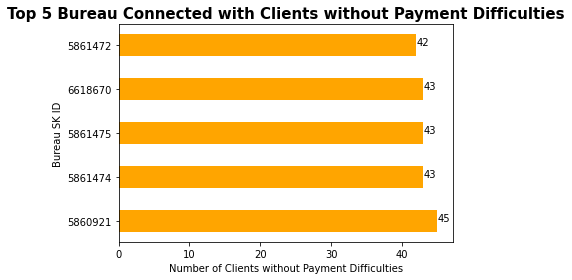

In [31]:
bID = [str(i) for i in b1counts.index.tolist()]
plt.barh(bID, b1counts, height=0.5, color="orange")
plt.xlabel("Number of Clients without Payment Difficulties")
plt.ylabel("Bureau SK ID")
plt.title("Top 5 Bureau Connected with Clients without Payment Difficulties",
          fontsize=15, fontweight="bold")
for i, v in enumerate(b1counts):
    plt.text(v, i, str(v))
plt.show()

***
as we can see in the plot above, most of the clients without payment difficulties are connected with the bureau of SK ID 5860821
***

In [32]:
test = pd.read_csv(base_dir+"application_test.csv")
test.head(11)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,100042,Cash loans,F,Y,Y,0,270000.0,959688.0,34600.5,810000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
6,100057,Cash loans,M,Y,Y,2,180000.0,499221.0,22117.5,373500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
7,100065,Cash loans,M,N,Y,0,166500.0,180000.0,14220.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
8,100066,Cash loans,F,N,Y,0,315000.0,364896.0,28957.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
9,100067,Cash loans,F,Y,Y,1,162000.0,45000.0,5337.0,45000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [33]:
test.shape

(48744, 121)

In [34]:
col_desc["Description"][1]

'Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)'

From the headers of the train and test dataframes above we can see that we are expected to predict the Target value based on the other columns/features.

From the columns descriptions, we find that Target indicates client with or without payment difficulties.

## **DATA CLEANING**

### (1) Drop single value columns

We don't need columns with only single values as those columns don't add any insight on our model. So we can find and drop those columns.

In [35]:
train.drop(columns=train.columns[train.nunique()==1], inplace=True)

### (2) Check for duplicate rows

In [36]:
train.duplicated().sum()

0

### (3) Check for outliers

In [37]:
#find IQR for each column
Q1 = train.quantile(.25)
Q3 = train.quantile(.75)
IQR = Q3-Q1
print(IQR)

SK_ID_CURR                    177997.0
TARGET                             0.0
CNT_CHILDREN                       1.0
AMT_INCOME_TOTAL               90000.0
AMT_CREDIT                    538650.0
                                ...   
AMT_REQ_CREDIT_BUREAU_DAY          0.0
AMT_REQ_CREDIT_BUREAU_WEEK         0.0
AMT_REQ_CREDIT_BUREAU_MON          0.0
AMT_REQ_CREDIT_BUREAU_QRT          0.0
AMT_REQ_CREDIT_BUREAU_YEAR         3.0
Length: 106, dtype: float64


Since outliers can only be calculated properly on numerical data, then let's find out what numerical columns do we have

In [38]:
numeric = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_cols = train.select_dtypes(include=numeric).columns
print(num_cols)

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=106)


Finding outliers on Target and Flag columns would be useless, as they contain only 1 or 0 values.

Thus leaving us with only a few columns to filter: children count, days birth, days employed, days id publish, and hour appr process start.

Considering the amount of rows that we have, immediately removing outliers wouldn't hurt the dataframe.

In [39]:
out_cols = ['CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START']

In [40]:
train3 = train[~((train[out_cols] < (Q1 - 1.5 * IQR)) |(train[out_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
train3.shape

C:\Users\Dama\AppData\Local\Temp\ipykernel_20956\1282945201.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  train3 = train[~((train[out_cols] < (Q1 - 1.5 * IQR)) |(train[out_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
C:\Users\Dama\AppData\Local\Temp\ipykernel_20956\1282945201.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  train3 = train[~((train[out_cols] < (Q1 - 1.5 * IQR)) |(train[out_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]


(229430, 122)

### (4) Convert categorical data

To convert categorical values in the dataset we can use pd.get_dummies

In [41]:
train4 = pd.get_dummies(train3)
train4

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0,0,0,0,1,0,1,0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,1,0,0,0,0,0,0,1,0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307500,456244,0,0,261000.0,1303812.0,35982.0,1138500.0,0.031329,-20390,-5326,...,0,0,0,0,0,1,0,0,1,0
307503,456247,0,0,112500.0,345510.0,17770.5,247500.0,0.022800,-11870,-399,...,0,0,0,0,0,0,0,0,0,0
307506,456251,0,0,157500.0,254700.0,27558.0,225000.0,0.032561,-9327,-236,...,0,0,0,0,0,0,1,0,1,0
307509,456254,1,0,171000.0,370107.0,20205.0,319500.0,0.005313,-11961,-4786,...,0,0,0,0,0,0,1,0,1,0


### (5) Imputing

After removing outliers, we should find and fix missing or NaN values. We can achieve so by imputing them using the impute function in sklearn.

In [42]:
#find missing values
null_count = 0
for i in train4.isnull().sum():
    if i != 0 :
        null_count += 1
print(null_count)

61


In [43]:
from sklearn.impute import SimpleImputer
train5 = SimpleImputer().fit_transform(train4)
train5 = pd.DataFrame(train5, columns = train4.columns.tolist())
null_count = 0
for i in train5.isnull().sum():
    if i != 0 :
        null_count += 1
print(null_count)

0


In [44]:
train5

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100002.0,1.0,0.0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461.0,-637.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,100003.0,0.0,0.0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765.0,-1188.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,100004.0,0.0,0.0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046.0,-225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006.0,0.0,0.0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005.0,-3039.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007.0,0.0,0.0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932.0,-3038.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229425,456244.0,0.0,0.0,261000.0,1303812.0,35982.0,1138500.0,0.031329,-20390.0,-5326.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
229426,456247.0,0.0,0.0,112500.0,345510.0,17770.5,247500.0,0.022800,-11870.0,-399.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
229427,456251.0,0.0,0.0,157500.0,254700.0,27558.0,225000.0,0.032561,-9327.0,-236.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
229428,456254.0,1.0,0.0,171000.0,370107.0,20205.0,319500.0,0.005313,-11961.0,-4786.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


We can see that after imputing, we successfully removed all the null values.

## **FEATURE ENGINEERING**

In model building we need to select features which will benefit our model the most. There are several techniques that we can use to find those features.

In [45]:
train5.drop('SK_ID_CURR', axis=1, inplace=True)
#removing SK ID columns as it serves no importance
train5

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,1.0,0.0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461.0,-637.0,-3648.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765.0,-1188.0,-1186.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046.0,-225.0,-4260.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005.0,-3039.0,-9833.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932.0,-3038.0,-4311.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229425,0.0,0.0,261000.0,1303812.0,35982.0,1138500.0,0.031329,-20390.0,-5326.0,-157.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
229426,0.0,0.0,112500.0,345510.0,17770.5,247500.0,0.022800,-11870.0,-399.0,-675.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
229427,0.0,0.0,157500.0,254700.0,27558.0,225000.0,0.032561,-9327.0,-236.0,-8456.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
229428,1.0,0.0,171000.0,370107.0,20205.0,319500.0,0.005313,-11961.0,-4786.0,-2562.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


### (1) Correlation Matrix Heatmap - Part 1

We'll go ahead and try the first technique, Correlation Matrix with Heatmap.

In [46]:
pear_corr = train5.corr(method='pearson')
pear_corr

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
TARGET,1.000000,0.001466,-0.006549,-0.040126,-0.019359,-0.050070,-0.042634,0.057977,0.069937,0.031705,...,0.001234,-0.008036,-0.003797,-0.012326,0.001149,-0.035759,-0.013094,0.007978,-0.046431,0.005110
CNT_CHILDREN,0.001466,1.000000,-0.004194,-0.016105,-0.007327,-0.019777,-0.029661,0.230612,-0.001257,0.146623,...,-0.003358,-0.002026,0.000396,-0.000146,-0.002051,-0.012324,-0.021508,0.010195,-0.027876,0.004716
AMT_INCOME_TOTAL,-0.006549,-0.004194,1.000000,0.139226,0.168381,0.141876,0.072136,-0.020939,-0.020961,0.011870,...,0.001049,0.011657,0.005257,0.022540,0.003141,0.029770,0.015619,-0.003015,0.046473,-0.002745
AMT_CREDIT,-0.040126,-0.016105,0.139226,1.000000,0.761653,0.985949,0.106095,-0.158166,-0.094103,-0.013856,...,0.000855,0.017089,0.007738,0.027344,0.006123,0.047000,0.012085,-0.006786,0.062458,-0.003824
AMT_ANNUITY,-0.019359,-0.007327,0.168381,0.761653,1.000000,0.765277,0.123057,-0.094669,-0.071564,0.010812,...,0.002663,0.017443,0.008763,0.033745,0.004995,0.053864,0.009536,-0.007376,0.068077,-0.003218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WALLSMATERIAL_MODE_Panel,-0.035759,-0.012324,0.029770,0.047000,0.053864,0.049976,0.093430,-0.013970,-0.015601,-0.066308,...,-0.022348,-0.091190,-0.046286,-0.041209,-0.038395,1.000000,-0.271808,-0.070081,0.502009,-0.040707
"WALLSMATERIAL_MODE_Stone, brick",-0.013094,-0.021508,0.015619,0.012085,0.009536,0.014982,0.011381,-0.014201,-0.007782,-0.025508,...,0.027483,-0.090255,-0.045812,-0.040786,-0.038001,-0.271808,1.000000,-0.069362,0.491401,-0.009163
WALLSMATERIAL_MODE_Wooden,0.007978,0.010195,-0.003015,-0.006786,-0.007376,-0.008431,-0.058640,0.008332,0.006055,-0.000386,...,0.126933,-0.023271,-0.011812,-0.010516,-0.009798,-0.070081,-0.069362,1.000000,0.077887,0.275960
EMERGENCYSTATE_MODE_No,-0.046431,-0.027876,0.046473,0.062458,0.068077,0.066966,0.106459,-0.025188,-0.018981,-0.071435,...,0.052881,0.162473,0.077906,0.075253,0.060505,0.502009,0.491401,0.077887,1.000000,-0.091997


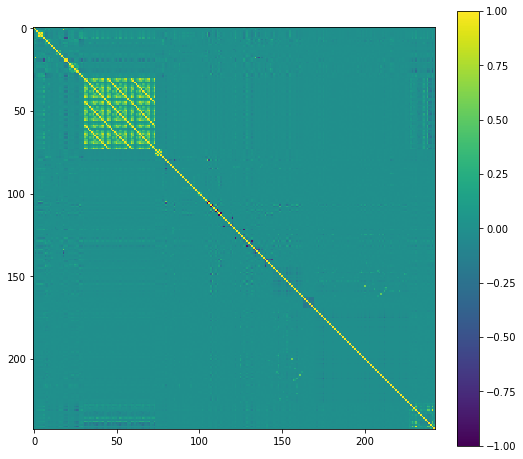

In [47]:
fig3, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(pear_corr, interpolation="nearest")
fig3.colorbar(im, orientation='vertical', fraction = 0.05)

As you might infer from the plot above, we still have waaayyy too many columns. Let's try moving on to the next method and see if it helps a bit.

### (2) Univariate Selection

In [48]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

bestfeatures = SelectKBest(score_func=f_classif, k=10)
features = []
for i in train5.columns.tolist():
    if i != 'TARGET':
        features.append(i)
    else:
        pass
x1 = train5[features]
y1 = train5['TARGET']
fit_us = bestfeatures.fit(x1, y1)
dfscores = pd.DataFrame(fit_us.scores_)
dfcolumns = pd.DataFrame(x1.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Feature', 'Score']
featureScores = featureScores.sort_values('Score', ascending=False)
featureScores


,Feature,Score
28,EXT_SOURCE_2,7041.978848
29,EXT_SOURCE_3,5845.166852
27,EXT_SOURCE_1,2344.310396
7,DAYS_EMPLOYED,1127.684358
19,REGION_RATING_CLIENT_W_CITY,1106.010886
...,...,...
22,REG_REGION_NOT_WORK_REGION,0.005709
168,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,0.003611
201,ORGANIZATION_TYPE_Mobile,0.003216
116,NAME_TYPE_SUITE_Other_A,0.000634


Now, with the univariate selection method we can at least get a better picture of what features we should use. The 15 most relevant features are listed above. But let's try the third method just to have a second opinion.

### (3) Feature Importances (a.k.a ExtraTreesClassifier method)

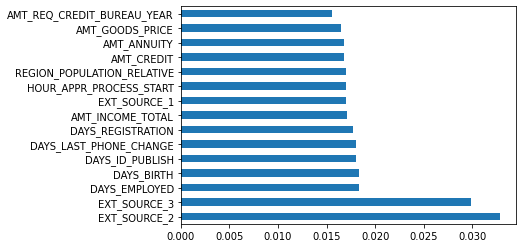

In [49]:
from sklearn.ensemble import ExtraTreesClassifier
fi_model = ExtraTreesClassifier()
fi_model.fit(x1, y1)
feat_importances = pd.Series(fi_model.feature_importances_, index=x1.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

The graph above shows us the 15 most relevant features according to the feature importances method.

Now to create a new and improved correlation matrix heatmap let's select the overlapping features from the univariate selection method and feature importances method. Then we can finally choose the features we should use to build a model.

In [50]:
featureScores['Feature'].head(60).tolist()

['EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'EXT_SOURCE_1',
 'DAYS_EMPLOYED',
 'REGION_RATING_CLIENT_W_CITY',
 'NAME_EDUCATION_TYPE_Higher education',
 'REGION_RATING_CLIENT',
 'NAME_EDUCATION_TYPE_Secondary / secondary special',
 'DAYS_LAST_PHONE_CHANGE',
 'DAYS_BIRTH',
 'AMT_GOODS_PRICE',
 'CODE_GENDER_M',
 'CODE_GENDER_F',
 'EMERGENCYSTATE_MODE_No',
 'HOUSETYPE_MODE_block of flats',
 'FLAG_DOCUMENT_3',
 'NAME_INCOME_TYPE_Working',
 'REGION_POPULATION_RELATIVE',
 'REG_CITY_NOT_WORK_CITY',
 'REG_CITY_NOT_LIVE_CITY',
 'AMT_CREDIT',
 'DAYS_ID_PUBLISH',
 'NAME_CONTRACT_TYPE_Cash loans',
 'NAME_CONTRACT_TYPE_Revolving loans',
 'OCCUPATION_TYPE_Laborers',
 'WALLSMATERIAL_MODE_Panel',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'FLAG_OWN_CAR_Y',
 'FLAG_OWN_CAR_N',
 'FLOORSMAX_AVG',
 'FLOORSMAX_MEDI',
 'FLOORSMAX_MODE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'HOUR_APPR_PROCESS_START',
 'DAYS_REGISTRATION',
 'NAME_FAMILY_STATUS_Married',
 'NAME_INCOME_TYPE_Commercial associate',
 'OCCUPATION_TYPE_Accountants',
 'OCCUPATION_

In [51]:
feat_importances.nlargest(60).index.tolist()

['EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_EMPLOYED',
 'DAYS_BIRTH',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE',
 'DAYS_REGISTRATION',
 'AMT_INCOME_TOTAL',
 'EXT_SOURCE_1',
 'HOUR_APPR_PROCESS_START',
 'REGION_POPULATION_RELATIVE',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'CNT_FAM_MEMBERS',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'CNT_CHILDREN',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'ORGANIZATION_TYPE_Business Entity Type 3',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_OWN_REALTY_Y',
 'FLAG_OWN_REALTY_N',
 'OWN_CAR_AGE',
 'WEEKDAY_APPR_PROCESS_START_TUESDAY',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'WEEKDAY_APPR_PROCESS_START_WEDNESDAY',
 'ORGANIZATION_TYPE_Self-employed',
 'WEEKDAY_APPR_PROCESS_START_THURSDAY',
 'WEEKDAY_APPR_PROCESS_START_FRIDAY',
 'OCCUPATION_TYPE_Laborers',
 'WEEKDAY_APPR_PROCESS_START_MONDAY',
 'LIVE_CITY_NOT_WORK_CITY',
 'NAME_FAMILY_STATUS_Married',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'REGION_R

In [52]:
corr_columns = ['TARGET']
for feature in featureScores['Feature'].head(60).tolist():
    if feature in feat_importances.nlargest(60).index.tolist():
        corr_columns.append(feature)
print(len(corr_columns))

31


### (4) Correlation Matrix Heatmap - Part 1

In [53]:
corr_mat_df = train5[corr_columns]
pear_corr2 = corr_mat_df.corr(method='pearson')
pear_corr2

,TARGET,EXT_SOURCE_2,EXT_SOURCE_3,EXT_SOURCE_1,DAYS_EMPLOYED,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,DAYS_LAST_PHONE_CHANGE,DAYS_BIRTH,AMT_GOODS_PRICE,...,NAME_FAMILY_STATUS_Married,NAME_INCOME_TYPE_Commercial associate,NAME_FAMILY_STATUS_Single / not married,TOTALAREA_MODE,NAME_HOUSING_TYPE_House / apartment,LIVINGAREA_MEDI,FLAG_PHONE,LIVINGAREA_MODE,LIVE_CITY_NOT_WORK_CITY,AMT_REQ_CREDIT_BUREAU_YEAR
TARGET,1.000000,-0.172568,-0.157620,-0.100572,0.069937,0.069265,0.067213,0.060330,0.057977,-0.050070,...,-0.029843,-0.028905,0.027375,-0.025552,-0.025357,-0.024922,-0.023739,-0.023201,0.022746,0.022376
EXT_SOURCE_2,-0.172568,1.000000,0.107047,0.158276,-0.098285,-0.295185,-0.299632,-0.204543,-0.148898,0.148443,...,0.048012,0.090188,-0.048752,0.066334,0.042499,0.066049,0.065296,0.058349,-0.071028,-0.022698
EXT_SOURCE_3,-0.157620,0.107047,1.000000,0.104859,-0.109420,-0.010978,-0.011640,-0.079971,-0.153521,0.060757,...,0.029100,0.001914,-0.042852,0.005570,0.043481,0.004676,-0.001457,0.004541,-0.017230,-0.071647
EXT_SOURCE_1,-0.100572,0.158276,0.104859,1.000000,-0.135351,-0.098871,-0.098674,-0.101537,-0.350815,0.144784,...,0.058514,0.049232,-0.093637,0.040116,0.095693,0.039204,0.053096,0.036052,-0.050231,-0.002444
DAYS_EMPLOYED,0.069937,-0.098285,-0.109420,-0.135351,1.000000,0.000181,-0.001768,0.161367,0.245334,-0.096895,...,-0.090517,0.042342,0.102059,-0.004743,-0.065732,-0.004459,-0.046810,-0.004605,0.058818,-0.016663
REGION_RATING_CLIENT_W_CITY,0.069265,-0.295185,-0.010978,-0.098871,0.000181,1.000000,0.950999,0.026994,0.046593,-0.118474,...,0.016907,-0.152130,-0.016422,-0.134245,0.010779,-0.131852,-0.082956,-0.112664,0.005708,0.016654
REGION_RATING_CLIENT,0.067213,-0.299632,-0.011640,-0.098674,-0.001768,0.950999,1.000000,0.027538,0.046536,-0.110264,...,0.014109,-0.162178,-0.014315,-0.122592,0.006333,-0.119951,-0.088730,-0.099428,-0.013473,0.017280
DAYS_LAST_PHONE_CHANGE,0.060330,-0.204543,-0.079971,-0.101537,0.161367,0.026994,0.027538,1.000000,0.139168,-0.077788,...,-0.058924,-0.010271,0.072920,-0.004365,-0.026321,-0.006623,-0.073245,-0.005453,0.026604,-0.102826
DAYS_BIRTH,0.057977,-0.148898,-0.153521,-0.350815,0.245334,0.046593,0.046536,0.139168,1.000000,-0.152140,...,-0.072776,-0.001951,0.191959,-0.007331,-0.173950,-0.006457,-0.038809,-0.005095,0.017154,-0.056919
AMT_GOODS_PRICE,-0.050070,0.148443,0.060757,0.144784,-0.096895,-0.118474,-0.110264,-0.077788,-0.152140,1.000000,...,0.143137,0.096893,-0.108744,0.057212,0.057710,0.054441,0.047395,0.049832,-0.015614,-0.050859


C:\Users\Dama\AppData\Local\Temp\ipykernel_20956\1419115010.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels([0]+corr_columns, rotation=35, fontsize=8)
C:\Users\Dama\AppData\Local\Temp\ipykernel_20956\1419115010.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_yticklabels([0]+corr_columns, rotation=0, fontsize=8)


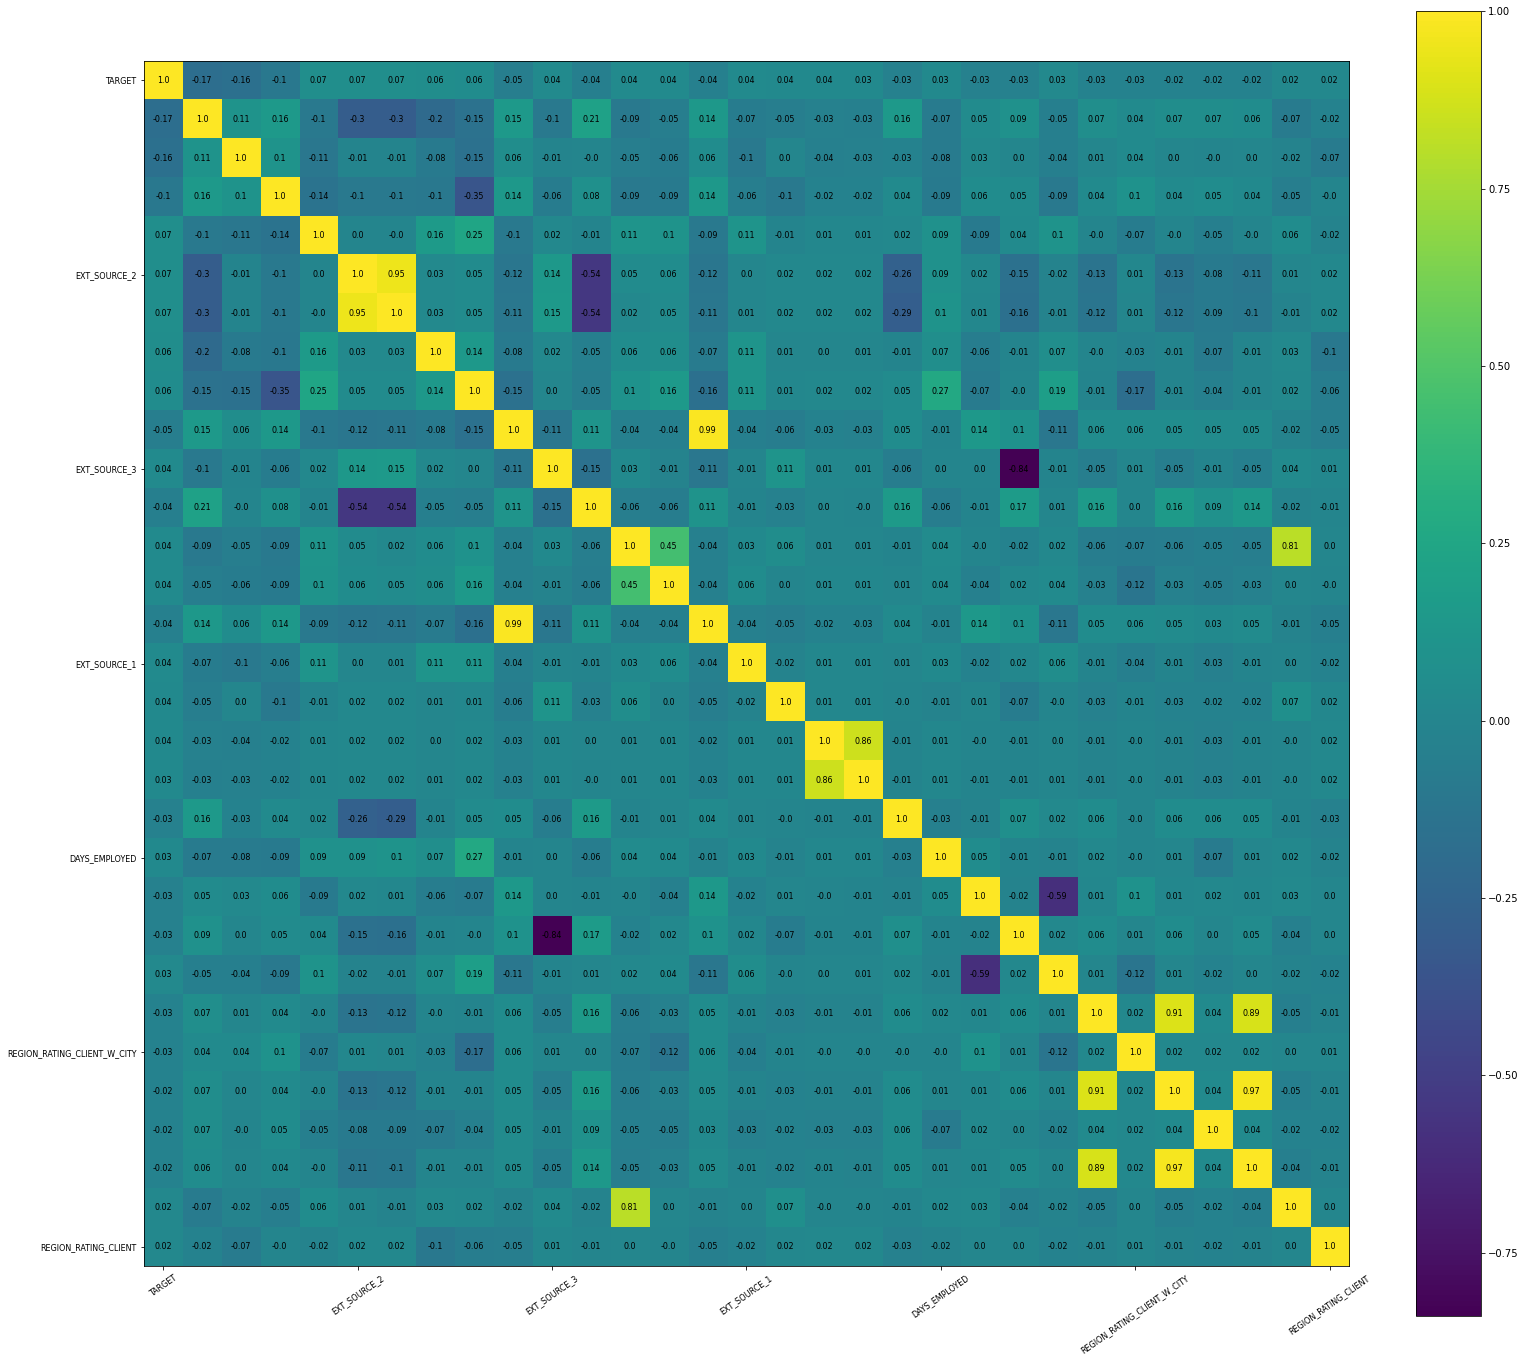

In [54]:
fig4, ax4 = plt.subplots(figsize=(24,24))
im2 = ax4.imshow(pear_corr2, interpolation="nearest")
fig4.colorbar(im2, orientation='vertical', fraction = 0.05)

ax4.set_xticklabels([0]+corr_columns, rotation=35, fontsize=8)
ax4.set_yticklabels([0]+corr_columns, rotation=0, fontsize=8)

"""x_ticks_loc = ax4.get_xticks().tolist()
ax4.xaxis.set_major_locator(mticker.FixedLocator(x_ticks_loc))
ax4.set_xticklabels(x_ticks_loc)

y_ticks_loc = ax4.get_yticks().tolist()
ax4.yaxis.set_major_locator(mticker.FixedLocator(y_ticks_loc))
ax4.set_yticklabels(y_ticks_loc)"""

for i in range(len(corr_mat_df.columns)):
    for j in range(len(corr_mat_df.columns)):
        text = ax4.text(j, i, round(pear_corr2.to_numpy()[i, j], 2),
                       ha='center', va='center', color='black',
                       fontsize=8)
plt.show()

From the correlation matrix heatmap above we can now at least narrow down our feature options.
Let's perform some calculations to find out which columns are positively related to the TARGET column.

In [55]:
fix_features = []
for i in range(1):
    for j in range(1, len(corr_mat_df.columns)):
        if round(pear_corr2.to_numpy()[i, j], 2) > 0:
            fix_features.append(pear_corr2.columns[j])
fix_features

['DAYS_EMPLOYED',
 'REGION_RATING_CLIENT_W_CITY',
 'REGION_RATING_CLIENT',
 'DAYS_LAST_PHONE_CHANGE',
 'DAYS_BIRTH',
 'NAME_INCOME_TYPE_Working',
 'REG_CITY_NOT_WORK_CITY',
 'REG_CITY_NOT_LIVE_CITY',
 'DAYS_ID_PUBLISH',
 'OCCUPATION_TYPE_Laborers',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_REGISTRATION',
 'NAME_FAMILY_STATUS_Single / not married',
 'LIVE_CITY_NOT_WORK_CITY',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

We found out that the columns above are the positively realted columns. Thus we can use them as features in our model.

## **MODEL BUILDING**

***
In this project we will use the 3 most popular classification algorithms for our models. We will then evaluate each algorithm and pick the best performing model.
***

In [56]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler  

scaler = StandardScaler()  

#declaring features and target value
X = train5[fix_features]
y = train5['TARGET']

#splitting into train and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

scaler.fit(X_train)
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

### Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression

LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

LogisticRegression()

In [58]:
y_pred = LR_model.predict(X_test)

In [59]:
print('Accuracy of logistic regression classifier on test set: {:.5f}'.format(LR_model.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.90912


We can see that a regular regression classifier is already pretty accurate on the train data. But let's check the ROC curve too, just to be sure.

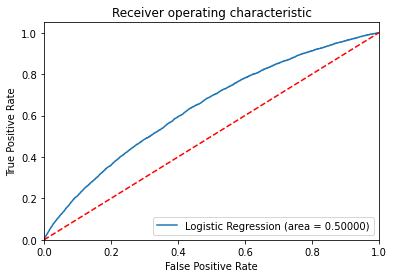

In [60]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc_LR = roc_auc_score(y_test, LR_model.predict(X_test))
LR_fpr, LR_tpr, LR_thresholds = roc_curve(y_test, LR_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(LR_fpr, LR_tpr, label='Logistic Regression (area = %0.5f)' % logit_roc_auc_LR)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LR_ROC')
plt.show()

As shown above, our LR model isn't that great. But let's leave it at that for now and move on to evaluate our next model.

### K-Nearest Neighbors (KNN)

In a KNN model, we need to define a k value, which is the number of neighbors to consider in the voting. We will determine the optimal value of k using an error graph.

In [61]:
from sklearn.neighbors import KNeighborsClassifier

k_test_vals = [k for k in range(3, 30, 3)]
error = []
KNN_acc = []
for i in k_test_vals:
    test_model = KNeighborsClassifier(n_neighbors=i)
    test_model.fit(X_train, y_train)
    pred_i = test_model.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    KNN_acc.append(metrics.accuracy_score(y_test, pred_i))

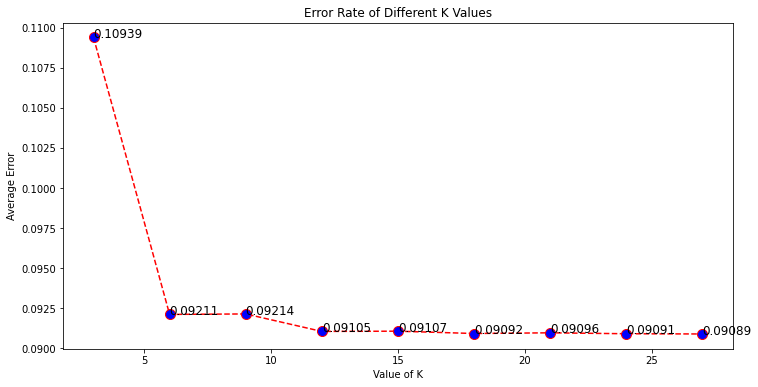

In [62]:
KNN_fig1, KNN_ax1 = plt.subplots(figsize=(12, 6))  
plt.plot(k_test_vals, error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate of Different K Values')  
plt.xlabel('Value of K')  
plt.ylabel('Average Error')
for i in range(len(k_test_vals)):
        KNN_ax1.text(k_test_vals[i], error[i], round(error[i], 5), size=12)
plt.show()

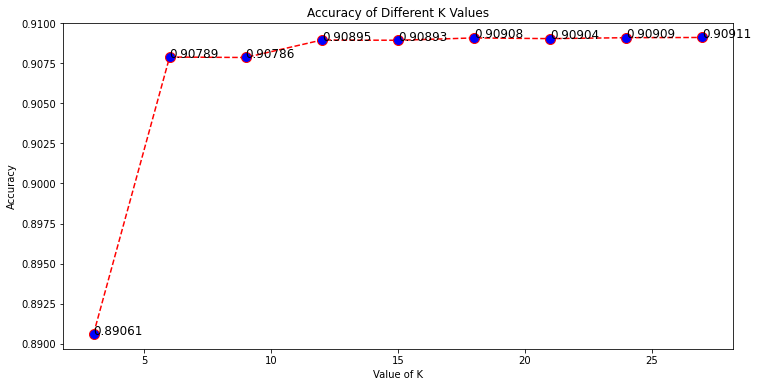

In [63]:
KNN_fig2, KNN_ax2 = plt.subplots(figsize=(12, 6))   
plt.plot(k_test_vals, KNN_acc, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy of Different K Values')  
plt.xlabel('Value of K')  
plt.ylabel('Accuracy')
for i in range(len(k_test_vals)):
        KNN_ax2.text(k_test_vals[i], KNN_acc[i], round(KNN_acc[i], 5), size=12)
plt.show()

As seen in the above graphs, the optimal value for K is somewhere around 27. Where the average error is 0.09089 and the accuracy is 0.90911. So, let's use that value and try to build our model.

In [64]:
k_val = 27

KNN_model = KNeighborsClassifier(n_neighbors=k_val)
KNN_model.fit(X_train, y_train)

y_pred = KNN_model.predict(X_test)


In [65]:
print('Accuracy of KNN classifier on test set: {:.5f}'.format(KNN_model.score(X_test, y_test)))

Accuracy of KNN classifier on test set: 0.90911


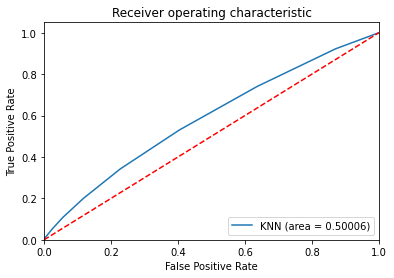

In [66]:
KNN_logit_roc_auc = roc_auc_score(y_test, KNN_model.predict(X_test))
KNN_fpr, KNN_tpr, KNN_thresholds = roc_curve(y_test, KNN_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(KNN_fpr, KNN_tpr, label='KNN (area = %0.5f)' % KNN_logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

Unfortunately, looking at the ROC Curve for our KNN model, it seems that it is performing worse than the LR model. But we'll try optimizing the two previous models after our last model testing.

### Random Forest

Similar to KNN algorithm, in random forest there is a value that we must determine beforehand, that is the number of estimators we need. To find the best number of estimators we could do another test with an accuracy graph.

In [67]:
from sklearn.ensemble import RandomForestClassifier

N_test_vals = [N for N in range(25, 250, 25)]
RF_error = []
RF_acc = []
for i in N_test_vals:
    RF_test_model = RandomForestClassifier(n_estimators=i, random_state=0)
    RF_test_model.fit(X_train, y_train)
    pred_i = RF_test_model.predict(X_test)
    RF_error.append(np.mean(pred_i != y_test))
    RF_acc.append(metrics.accuracy_score(y_test, pred_i))

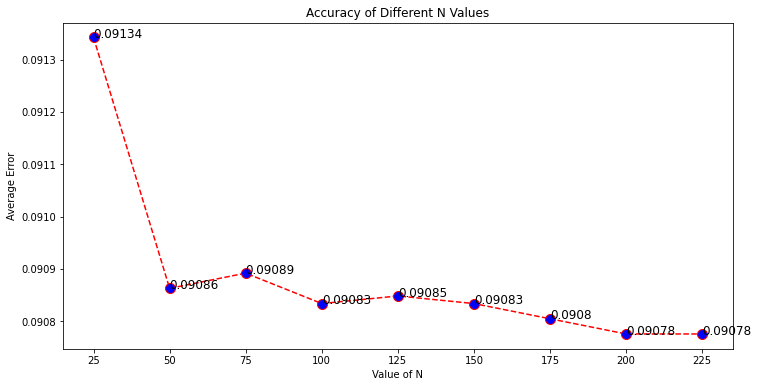

In [68]:
RF_fig1, RF_ax1 = plt.subplots(figsize=(12, 6))   
plt.plot(N_test_vals, RF_error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy of Different N Values')  
plt.xlabel('Value of N')  
plt.ylabel('Average Error')
for i in range(len(N_test_vals)):
        RF_ax1.text(N_test_vals[i], RF_error[i], round(RF_error[i], 5), size=12)
plt.show()

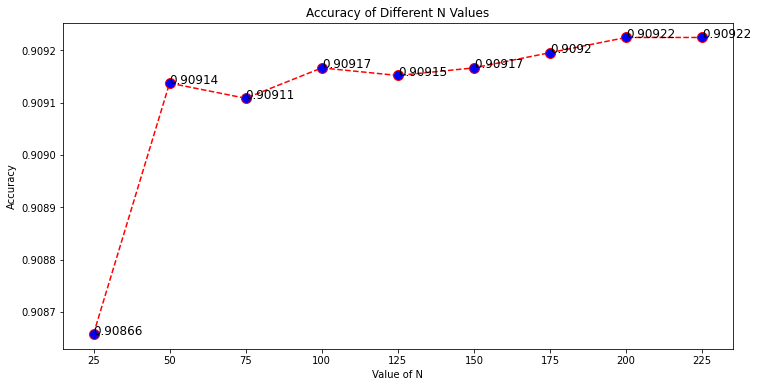

In [69]:
RF_fig2, RF_ax2 = plt.subplots(figsize=(12, 6))   
plt.plot(N_test_vals, RF_acc, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy of Different N Values')  
plt.xlabel('Value of N')  
plt.ylabel('Accuracy')
for i in range(len(N_test_vals)):
        RF_ax2.text(N_test_vals[i], RF_acc[i], round(RF_acc[i], 5), size=12)
plt.show()

From the graphs above we can see that the optimal value of N is around 200. Where after that, the accuracy and error seems to flat out. So let's build our random forest model with that value.

In [70]:
N_val = 225

RF_model = RandomForestClassifier(n_estimators=N_val, random_state=0)
RF_model.fit(X_train, y_train)

y_pred = RF_model.predict(X_test)


In [71]:
print('Accuracy of RF classifier on test set: {:.5f}'.format(RF_model.score(X_test, y_test)))

Accuracy of RF classifier on test set: 0.90922


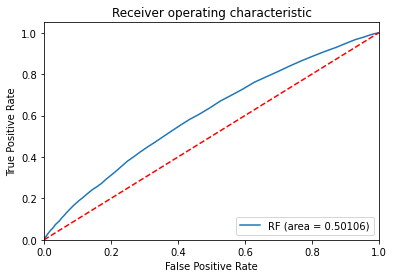

In [90]:
RF_logit_roc_auc = roc_auc_score(y_test, RF_model.predict(X_test))
RF_fpr, RF_tpr, RF_thresholds = roc_curve(y_test, RF_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(RF_fpr, RF_tpr, label='RF (area = %0.5f)' % RF_logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

After looking at the 3 previous models, we can see from the final accuracy that the random forests model has the highest accuracy, but all of them managed to pass 0.90 accuracy. Thus, our next concern should be the ROC graph because optimizing the sensitivity and specifity trade-off is harder than optimizing accuracy. From the ROC graph we can infer that the random forest model performs the best out of three models (0.50106 auc). So overall, the Random Forest model performs best.

### Random Forest Hyperparameter Customization

The model we've built above is using the default values for the Random Forest hyperparameters. It is possible that there are better hyperparameters for our data, thus we need to do some customization.

Considering the amount of data and computational time and resources. We probably can't add too much more n_estimators, twice the above model (450 estimators) would probably be the upper bound. Besides, adding more than 500 trees usually isn't effective. Thus, we should consider changing other hyperparameters.

In [83]:
from sklearn.model_selection import RandomizedSearchCV

# Create a search grid of parameters that will be shuffled through

param_dist = {
'n_estimators': [125, 225, 325],
'criterion': ['gini', 'entropy', 'log_loss'],
'min_samples_split': [2, 4, 6],
'min_samples_leaf': [1, 2, 3],
'max_features': ['sqrt', 'log2', 'auto'],
'n_jobs': [3],
'random_state': [0]
}

# Using RandomizedSearchCV and searching for best hyperparameters
new_RF = RandomForestClassifier()

RCV_new_RF = RandomizedSearchCV(estimator= new_RF, param_distributions=param_dist,
                         cv=3, verbose=2, n_jobs=3, n_iter=30, random_state=0)

rand_res = RCV_new_RF.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


In [84]:
rand_res.best_params_

{'random_state': 0,
 'n_jobs': 3,
 'n_estimators': 325,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'criterion': 'entropy'}

In [85]:
rand_res.best_score_

0.9113953212398633

In [86]:
print('Accuracy of the RandomizedCV RF model on test set: {:.5f}'.format(rand_res.score(X_test, y_test)))

Accuracy of the RandomizedCV RF model on test set: 0.90917


As we can see above, the best parameters found using the randomized search yielded an accuracy score of 0.91 on the test set, which is, ironically, lower than the initial accuracy score. But let's try plotting the ROC graph to see if it performs better than the initial model.

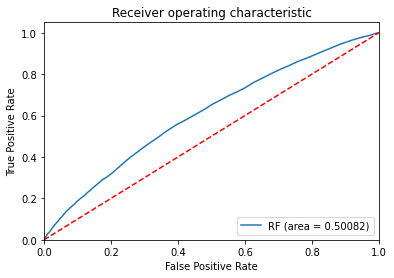

In [89]:
Rand_res_roc_auc = roc_auc_score(y_test, rand_res.predict(X_test))
RF_fpr, RF_tpr, RF_thresholds = roc_curve(y_test, rand_res.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(RF_fpr, RF_tpr, label='RF (area = %0.5f)' % Rand_res_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Rand_res_ROC')
plt.show()

Turns out it does perform worse than the default settings. This might be because random search determines best parameters only from the accuracy score on the train set, thus more likely not being able to generalize over the test set (overfitting).

### Final RF Model

After playing around with the hyperparameters, we found out that the default values performed better. So our final RF model will use the same hyperparameters as the initial model.

In [102]:
final_n = 225

RF_final = RandomForestClassifier(n_estimators=final_n, random_state=0)
RF_final.fit(X_train, y_train)

RandomForestClassifier(n_estimators=225, random_state=0)

In [97]:
test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


before we can make our final predictions on the test data, we need to transform the test dataset so that it has the same columns (features) that we used for training and doesn't contain any NaN or missing values.

In [107]:
test_predict = pd.get_dummies(test)
test_features = test_predict[fix_features]
test_features

,DAYS_EMPLOYED,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,DAYS_LAST_PHONE_CHANGE,DAYS_BIRTH,NAME_INCOME_TYPE_Working,REG_CITY_NOT_WORK_CITY,REG_CITY_NOT_LIVE_CITY,DAYS_ID_PUBLISH,OCCUPATION_TYPE_Laborers,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_REGISTRATION,NAME_FAMILY_STATUS_Single / not married,LIVE_CITY_NOT_WORK_CITY,AMT_REQ_CREDIT_BUREAU_YEAR
0,-2329,2,2,-1740.0,-19241,1,0,0,-812,0,0.0,0.0,-5170.0,0,0,0.0
1,-4469,2,2,0.0,-18064,1,0,0,-1623,0,0.0,0.0,-9118.0,0,0,3.0
2,-4458,2,2,-856.0,-20038,1,0,0,-3503,0,0.0,0.0,-2175.0,0,0,4.0
3,-1866,2,2,-1805.0,-13976,1,0,0,-4208,0,0.0,0.0,-2000.0,0,0,3.0
4,-2191,2,2,-821.0,-13040,1,1,0,-4262,0,0.0,0.0,-4000.0,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,-5169,3,3,-684.0,-19970,1,0,0,-3399,0,0.0,0.0,-9094.0,0,0,1.0
48740,-1149,2,2,0.0,-11186,0,1,0,-3003,0,0.0,0.0,-3015.0,0,1,NaN
48741,-3037,2,2,-838.0,-15922,0,0,0,-1504,0,0.0,0.0,-2681.0,0,0,1.0
48742,-2731,2,2,-2308.0,-13968,0,1,0,-1364,0,0.0,0.0,-1461.0,0,1,2.0


In [108]:
test_features_imp = SimpleImputer().fit_transform(test_features)
test_features_imp = pd.DataFrame(test_features_imp, columns = test_features.columns.tolist())
null_count = 0
for i in test_features_imp.isnull().sum():
    if i != 0 :
        null_count += 1
print(null_count)

0


In [110]:
predictions = RF_final.predict(test_features_imp)

output = pd.DataFrame({'SK_ID_CURR': test.SK_ID_CURR, 'TARGET': predictions})
output.to_csv('pred_out.csv', index=False)
print("Your submission was successfully saved!")

c:\Users\Dama\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Your submission was successfully saved!


In [117]:
pred_out = pd.read_csv('./pred_out.csv')
pred_out.head(11)

,SK_ID_CURR,TARGET
0,100001,0.0
1,100005,0.0
2,100013,0.0
3,100028,0.0
4,100038,0.0
5,100042,0.0
6,100057,0.0
7,100065,0.0
8,100066,0.0
9,100067,0.0


In [118]:
pred_out.tail(11)

,SK_ID_CURR,TARGET
48733,456167,0.0
48734,456168,0.0
48735,456169,0.0
48736,456170,0.0
48737,456189,0.0
48738,456202,0.0
48739,456221,0.0
48740,456222,0.0
48741,456223,0.0
48742,456224,0.0


In [119]:
pred_out['TARGET'].value_counts()

0.0    48740
1.0        4
Name: TARGET, dtype: int64

From the pred_out dataframe we can conclude that out of 48744 ID's in the test dataset, 4 of them were given the TARGET value of 1 by our random forest model. That means our model predicts only 4 out of the 48744 possible clients are credible clients.